This notebook contains the PCA + K-Means clustering for syllable data

Used for pose estimation: Pereira, Talmo D., et al. Sleap: Multi-Animal Pose Tracking, 2 Sept. 2020, https://doi.org/10.1101/2020.08.31.276246. 
Used to generate syllable data from pose data: Weinreb, Caleb, et al. Keypoint-MoSeq: Parsing Behavior by Linking Point Tracking to Pose Dynamics, 17 Mar. 2023, https://doi.org/10.1101/2023.03.16.532307. 

In [2]:
# Required packages 
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# Read the CSV file that was generated using Keypoint-Moseq
behaviors = pd.read_csv("behavior_results.csv")
df = behaviors.dropna()
#df

<Axes: xlabel='run_sec', ylabel='run-sb'>

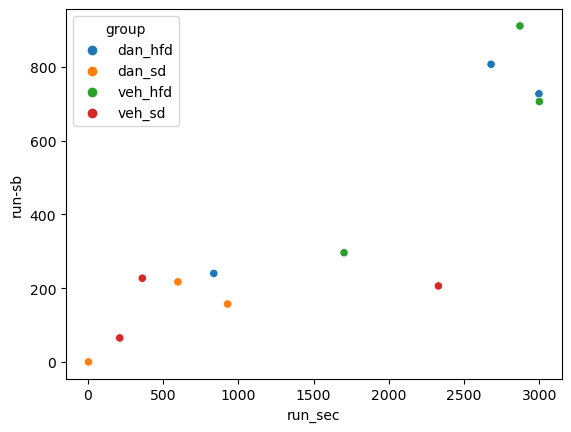

In [6]:
# play around with visualizing the data
sns.scatterplot(data = df, x = 'run_sec', y = 'run-sb', hue = 'group')

In [7]:
# Drop columns that will not be used in clustering
columns_to_drop = ['id', 'group', 'sex', 'water_sensor', 'wheel_sensor', 'food_sensor', 'np-np', 'groom-groom', 'turn-turn', 'sb-sb', 'run-run', 'sniff-sniff']

df_clean = df.drop(columns=columns_to_drop)
#df_clean

In [8]:
# Transform features to make values fall within the same range, so differences are on a comparable scale
scaler = StandardScaler() # using standard 
df_std = scaler.fit_transform(df_clean)

In [9]:
# Use PCA to reduce number of dimensions
pca = PCA()
pca.fit(df_std)

PCA()

In [10]:
# How much variance is explained by each of the components
pca.explained_variance_ratio_

array([4.31153014e-01, 1.99057304e-01, 1.16587199e-01, 7.40870181e-02,
       5.56318159e-02, 4.23509920e-02, 3.09645720e-02, 1.94061737e-02,
       1.84821731e-02, 9.85223613e-03, 2.42750214e-03, 1.65005658e-33])

Text(0, 0.5, 'Cummulative explained variance')

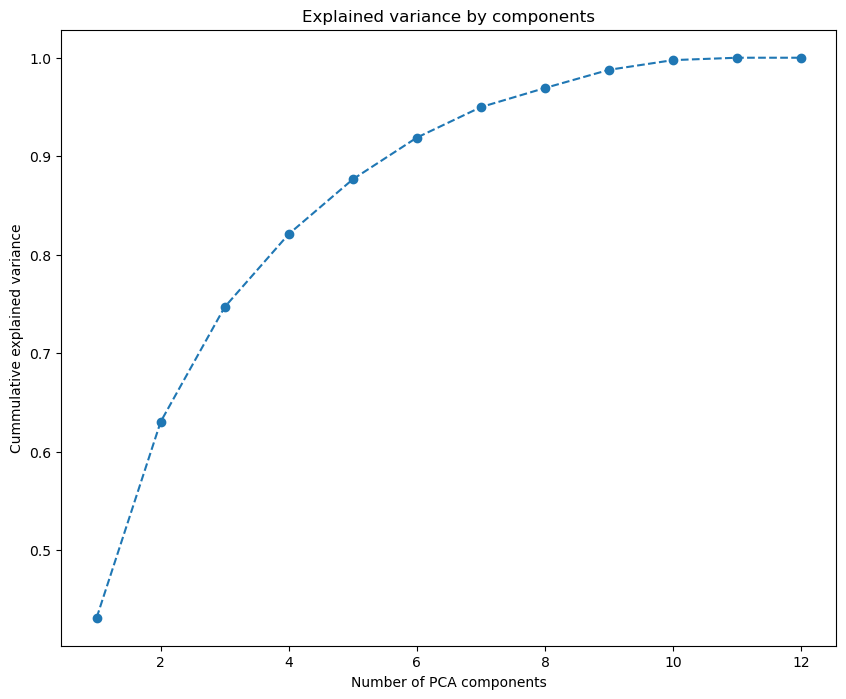

In [11]:
# Decide how many features to keep (pick minimum number of components to explain ~80% of the variance)

# change range upper number to number of samples (mice per condition) + 1
plt.figure(figsize = (10,8))
plt.plot(range(1,13), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of PCA components')
plt.ylabel('Cummulative explained variance')

In [12]:
# Perform PCA with the chosen number of components

# 3 or 4 seems right here
pca = PCA(n_components = 3)

# Fit the model
pca.fit(df_clean)

PCA(n_components=3)

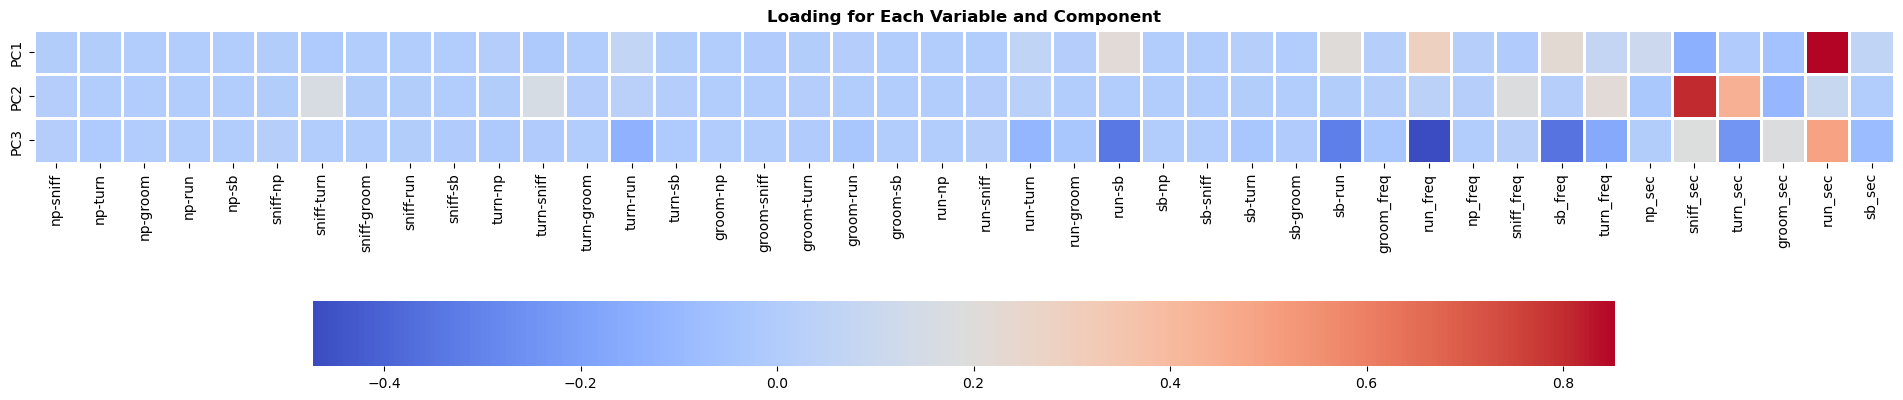

In [13]:
# Make a heatmap for weight of features in each PCA component 
fig, ax = plt.subplots(figsize=(24, 12))

ax = sns.heatmap(
    pca.components_,
    cmap='coolwarm',
    yticklabels=[f'PC{x}' for x in range(1, pca.n_components_ + 1)],
    xticklabels=list(df_clean.columns),
    linewidths=2,
    annot=False, #Make True to see numbers on squares
    fmt=',.2f',
    cbar_kws={"shrink": .7, "orientation": 'horizontal'}
)

ax.set_aspect("equal")
plt.title('Loading for Each Variable and Component', weight='bold')
plt.show()

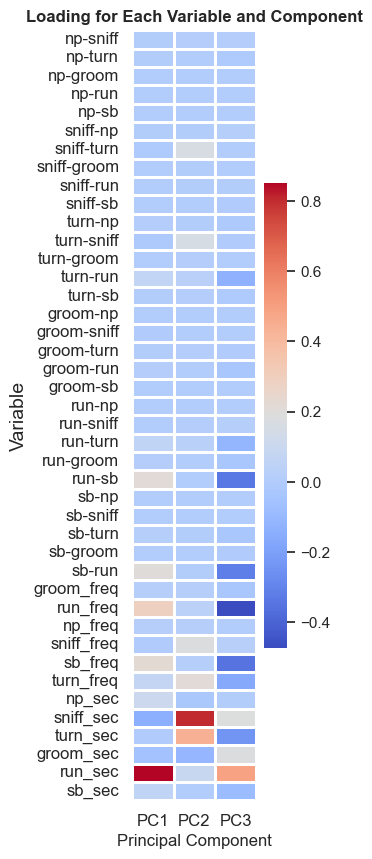

In [99]:
# Same plot as above but vertical (better for paper)
fig, ax = plt.subplots(figsize=(2, 10))

ax = sns.heatmap(
    pca.components_.T,  # Transpose the data
    cmap='coolwarm',
    xticklabels=[f'PC{x}' for x in range(1, pca.n_components_ + 1)],
    yticklabels=list(df_clean.columns),
    linewidths=2,
    annot=False, # Make True to see numbers on squares
    fmt=',.2f',
    cbar_kws={"shrink": .7, "orientation": 'vertical'}
)

ax.set_aspect('auto')
plt.title('Loading for Each Variable and Component', weight='bold')
plt.xlabel('Principal Component')
plt.ylabel('Variable',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

In [15]:
# Optional. Based on the weights, pick features to visualize

# Calculate the mean values for each group and each measurement
sniff_sec_group = df.groupby(['group'])['sniff_sec'].agg(['mean', 'sem'])
run_sec_group = df.groupby(['group'])['run_sec'].agg(['mean', 'sem'])
turn_sec_group = df.groupby(['group'])['turn_sec'].agg(['mean', 'sem'])
run_freq_group = df.groupby(['group'])['run_freq'].agg(['mean', 'sem'])
run_sb_group = df.groupby(['group'])['run-sb'].agg(['mean', 'sem'])
sb_freq_group = df.groupby(['group'])['sb_freq'].agg(['mean', 'sem'])

# Convert each series into a DataFrame with columns: group, value, measurement, sem
sniff_sec_df = pd.DataFrame({'group': sniff_sec_group.index, 'value': sniff_sec_group['mean'], 'sem': sniff_sec_group['sem'], 'measurement': 'sniff_sec'})
run_sec_df = pd.DataFrame({'group': run_sec_group.index, 'value': run_sec_group['mean'], 'sem': run_sec_group['sem'], 'measurement': 'run_sec'})
turn_sec_df = pd.DataFrame({'group': turn_sec_group.index, 'value': turn_sec_group['mean'], 'sem': turn_sec_group['sem'], 'measurement': 'turn_sec'})
run_freq_df = pd.DataFrame({'group': run_freq_group.index, 'value': run_freq_group['mean'], 'sem': run_freq_group['sem'], 'measurement': 'run_freq'})
run_sb_df = pd.DataFrame({'group': run_sb_group.index, 'value': run_sb_group['mean'], 'sem': run_sb_group['sem'], 'measurement': 'run-sb'})
sb_freq_df = pd.DataFrame({'group': sb_freq_group.index, 'value': sb_freq_group['mean'], 'sem': sb_freq_group['sem'], 'measurement': 'sb_freq'})

# Concatenate all DataFrames into one
combined_df = pd.concat([sniff_sec_df, run_sec_df, turn_sec_df, run_freq_df, run_sb_df, sb_freq_df], ignore_index=True)
#combined_df

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\irs3th\AppData\Local\Temp\ipykernel_14168\2470815663.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

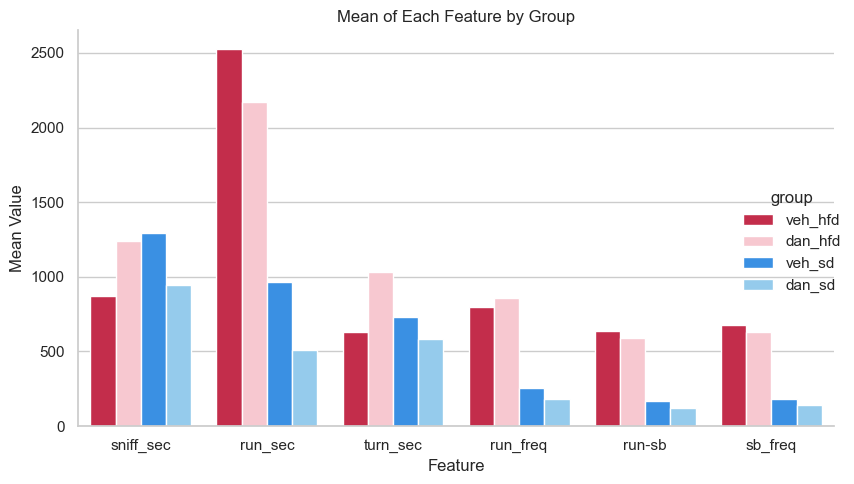

In [16]:
# Bar graph of measurements of interest colored by group (drug x diet)
group_order = ['veh_hfd', 'dan_hfd', 'veh_sd', 'dan_sd']
custom_palette = {"dan_hfd": 'pink', "dan_sd": 'lightskyblue', "veh_hfd": 'crimson', "veh_sd": 'dodgerblue'}

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.catplot(data=combined_df, x='measurement', y='value', hue='group', kind='bar', palette=custom_palette, aspect=1.5, order=['sniff_sec', 'run_sec', 'turn_sec', 'run_freq', 'run-sb', 'sb_freq'], hue_order=group_order)
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.title('Mean of Each Feature by Group')
plt.tight_layout()
plt.show()

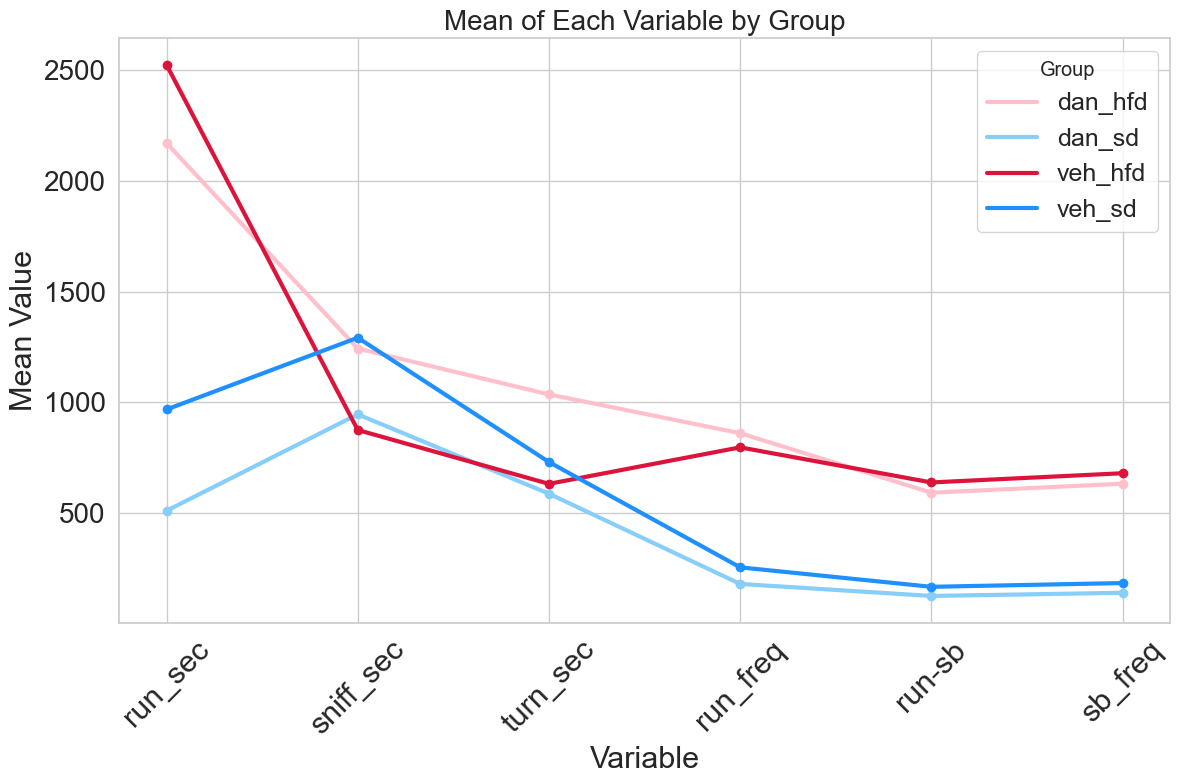

In [100]:
# Line graph of measurements of interest colored by group (drug x diet)
custom_palette = {"dan_hfd": 'pink', "dan_sd": 'lightskyblue', "veh_hfd": 'crimson', "veh_sd": 'dodgerblue'}
ordered_measurements = ['run_sec', 'sniff_sec', 'turn_sec', 'run_freq', 'run-sb', 'sb_freq']
combined_df = combined_df.set_index('measurement').loc[ordered_measurements].reset_index()


plt.figure(figsize=(12, 8))

for group, data in combined_df.groupby('group'):
    plt.plot(data["measurement"], data["value"], label=group, color=custom_palette[group], linewidth=3)

for group, data in combined_df.groupby('group'):
    plt.scatter(data["measurement"], data["value"], color=custom_palette[group], marker="o")

# Optionally plot confidence interval
#for group, data in combined_df.groupby('group'):
#    plt.fill_between(data["measurement"], data["value"] - data["value"].sem(), data["value"] + data["value"].sem(), alpha=0.3, color=custom_palette[group])

plt.title('Mean of Each Variable by Group', fontsize=20) 
plt.xlabel('Variable', fontsize=22)  
plt.ylabel('Mean Value', fontsize=22)  
plt.legend(title='Group', title_fontsize='large', fontsize=18)  
plt.xticks(rotation=45, fontsize=22)  
plt.yticks(fontsize=20)  
plt.tight_layout()
plt.show()

In [19]:
# Fit K-means using the transformed data from PCA
pca.transform(df_std)
scores_pca = pca.transform(df_std)

wcss = []
for i in range(1,12): #range should be <= # samples
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

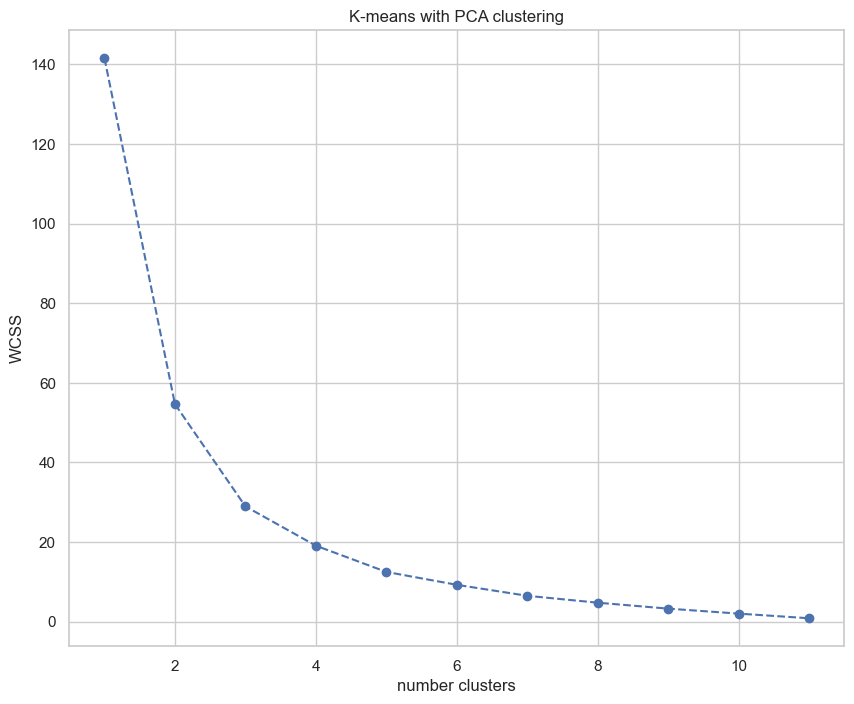

In [23]:
# Plot within-cluster sums of squares against the number of clusters
# look for a kink in the graph, in this case around 3 looks good
plt.figure(figsize=(10,8))
plt.plot(range(1,12), wcss, marker = 'o', linestyle='--') #range max = # of samples
plt.xlabel('number clusters')
plt.ylabel('WCSS') 
plt.title('K-means with PCA clustering')
plt.show()

In [24]:
# We chose 3 clusters, so run K-means with clusters = 3

# same init and random state as before
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

# fit our data with k-means pca model
kmeans_pca.fit(scores_pca)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [25]:
# create a new df with original features and add pca scores and assigned clusters
df_pca_kmeans = pd.concat([df_clean.reset_index(drop=True), pd.DataFrame(scores_pca)],axis=1)

#df_pca_kmeans.columns.values[-4: ] = ['component 1', 'component 2', 'component 3', 'component 4']
df_pca_kmeans.columns.values[-3: ] = ['component 1', 'component 2', 'component 3']

# last column has pca k-means clustering labels
df_pca_kmeans['k-means pca'] = kmeans_pca.labels_

df_pca_kmeans.head()

,np-sniff,np-turn,np-groom,np-run,np-sb,sniff-np,sniff-turn,sniff-groom,sniff-run,sniff-sb,...,np_sec,sniff_sec,turn_sec,groom_sec,run_sec,sb_sec,component 1,component 2,component 3,k-means pca
0,25,13,0,0,0,16,292,38,18,2,...,202.92,954.72,797.28,157.04,2997.88,189.12,-1624.979808,-1581.142110,-99.470923,0
1,42,6,1,0,0,24,350,37,13,8,...,272.84,1448.44,759.00,342.64,598.00,56.60,-1629.169281,-1580.821754,-96.324061,1
2,12,15,1,0,0,10,319,46,4,1,...,300.44,1239.20,757.64,331.28,1702.36,81.92,-1627.979838,-1581.310887,-96.524760,1
3,12,10,0,0,0,4,298,28,6,0,...,55.28,1501.04,731.84,382.12,211.52,14.00,-1630.333757,-1581.520607,-95.328652,1
4,38,44,2,0,2,14,265,19,5,5,...,628.76,782.32,1008.92,100.20,2679.76,213.40,-1624.367947,-1581.247018,-100.926610,0


In [40]:
#df_pca_kmeans['segment'] = df_pca_kmeans['k-means pca'].map({0:'1', 1:'2', 2: '3', 3: '4'})
df_pca_kmeans['segment'] = df_pca_kmeans['k-means pca'].map({0:'1', 1:'2',2: '3'})

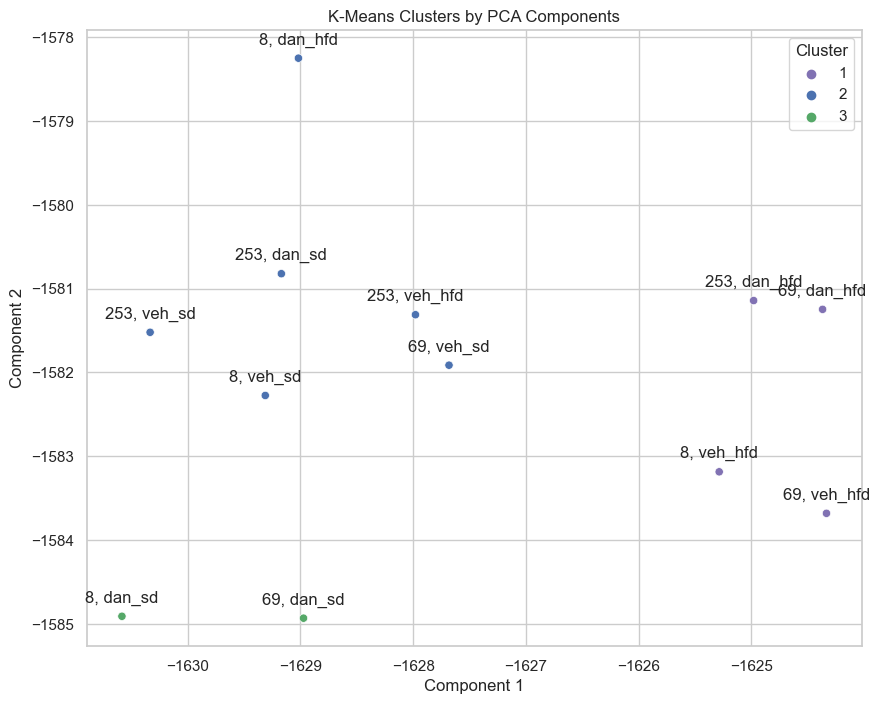

In [30]:
# 2D plot of our clusters
df_pca_kmeans['group'] = behaviors['group']
df_pca_kmeans['id'] = behaviors['id']

x_axis = df_pca_kmeans['component 1']
y_axis = df_pca_kmeans['component 2']
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_pca_kmeans['segment'], palette=['m', 'b', 'g'])

# Optionally annotate with mouse ID and group 
for i, txt in enumerate(zip(df_pca_kmeans['id'], df_pca_kmeans['group'])):
    plt.annotate(f'{txt[0]}, {txt[1]}', (x_axis[i], y_axis[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('K-Means Clusters by PCA Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()
#plt.savefig("clusters_all.png")

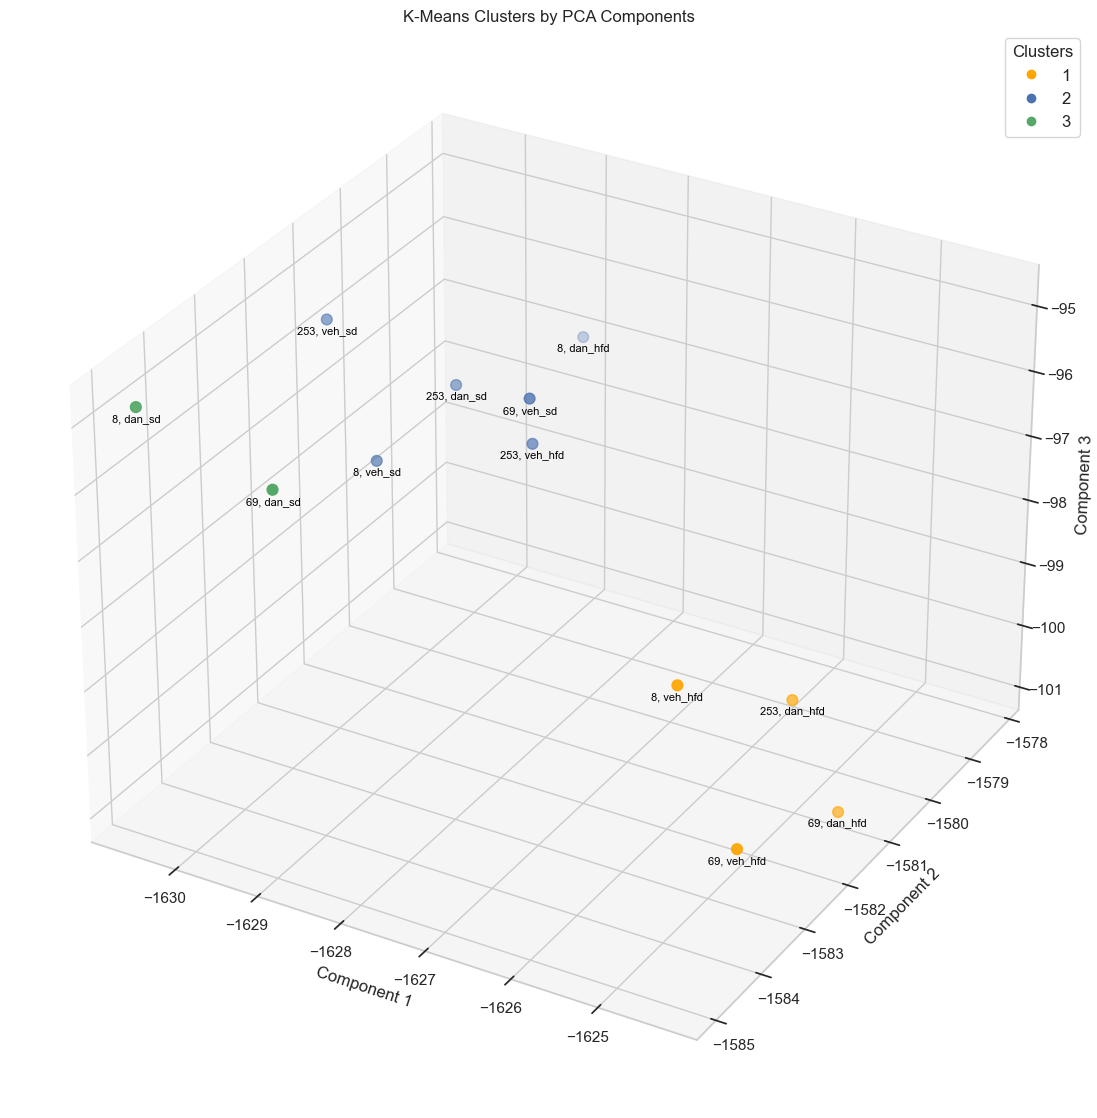

In [72]:
# Stationary 3D plot of the same clusters
x_axis = df_pca_kmeans['component 1']
y_axis = df_pca_kmeans['component 2']
z_axis = df_pca_kmeans['component 3']
segments = df_pca_kmeans['segment']
ids = df_pca_kmeans['id']
groups = df_pca_kmeans['group']

# Color for each cluster
segment_colors = {'1': 'orange', '2': 'b', '3': 'g'}
colors = segments.map(segment_colors)

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_axis, y_axis, z_axis, c=colors, s=60)  

legend_labels = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle='') for label, color in segment_colors.items()]
ax.legend(handles=legend_labels, title='Clusters', loc='upper right', fontsize='medium')

# Annotate optionally
for i, (x, y, z, id_value, group_value) in enumerate(zip(x_axis, y_axis, z_axis, ids, groups)):
    ax.text(x, y, z-0.25, f'{id_value}, {group_value}', color='black', fontsize=8, ha='center', va='bottom')  

# Labels
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('K-Means Clusters by PCA Components')
plt.show()

In [ ]:
#### 3D interactive plot (can rotate) 
x_axis = df_pca_kmeans['component 1']
y_axis = df_pca_kmeans['component 2']
z_axis = df_pca_kmeans['component 3']
segments = df_pca_kmeans['segment']
ids = df_pca_kmeans['id']
groups = df_pca_kmeans['group']

# Colors
segment_colors = {'1': 'orange', '2': 'blue', '3': 'green'} #need to write the full color name for this one
colors = segments.map(segment_colors)

# Create trace 
trace = go.Scatter3d(
    x=x_axis,
    y=y_axis,
    z=z_axis,
    mode='markers',
    marker=dict(
        size=5,
        color=colors,
        opacity=0.8
    ),
    text=[f'ID: {id_value}, Group: {group_value}' for id_value, group_value in zip(ids, groups)],
    hoverinfo='text'
)

# Set layout 
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Component 1'),
        yaxis=dict(title='Component 2'),
        zaxis=dict(title='Component 3'),
        aspectmode='cube'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Create
fig = go.Figure(data=[trace], layout=layout)
fig.show(renderer='iframe') #only works with 'iframe' 

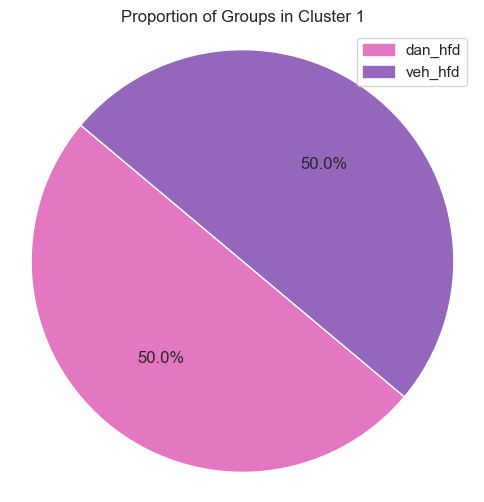

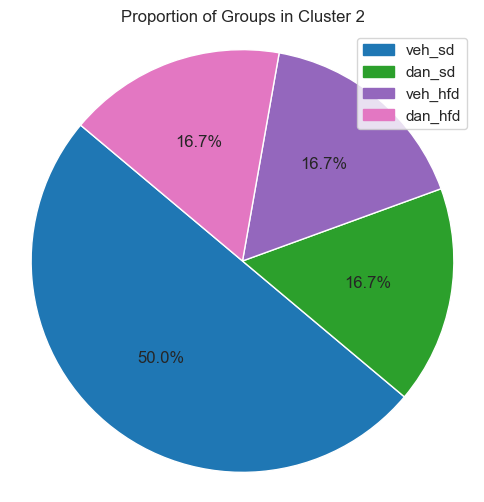

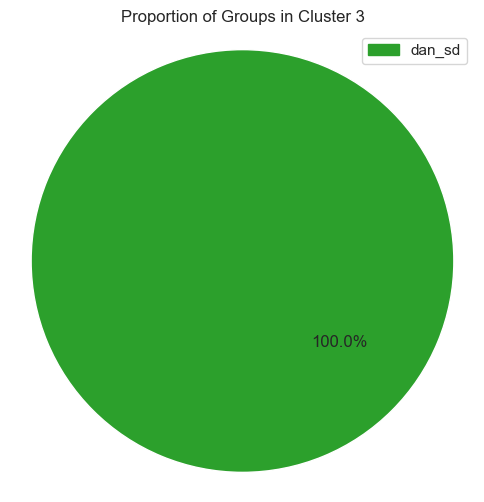

In [101]:
# Make pie charts that show group composition of each cluster
group_colors = {
    'dan_hfd': 'tab:pink',
    'veh_hfd': 'tab:purple',
    'dan_sd': 'tab:green',
    'veh_sd': 'tab:blue'
}

# Group by cluster
grouped = df_pca_kmeans.groupby('segment')

for segment, data in grouped:
    # Count the occurrences of each group within the cluster
    group_counts = data['group'].value_counts()
    
    # Pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(group_counts, autopct='%1.1f%%', startangle=140, colors=[group_colors.get(group, 'gray') for group in group_counts.index])
    plt.title(f'Proportion of Groups in Cluster {segment}')
    plt.axis('equal')  # equal = circle
    handles = [plt.Rectangle((0,0),1,1, color=group_colors[group]) for group in group_counts.index]
    plt.legend(handles, group_counts.index, loc='upper right')
    plt.show()